# Project 3

## Abstract
- We wrote our own tsp parser module due to the fact the available packages are not working for all tsp files
    - We tried: https://github.com/tsartsaris/TSPLIB-python-parser
- You can find the MMAS algorithm in `algorithm.py`. It's just the basic implementation as described in the exercise sheet.
- We document our results in this jupyter notebook:
    1. Test MMAS using the initial parameters
        - gr24 problem
        - Comparing $\beta=0$ with $\beta=4$
    2. Parameter tuning for all five parameters
        - gr48 problem
        - Grid search
        - Test resulting parameter setting on three different problems (gr24, gr48, gr96)
    3. Collect the extra credits
        - We found the optimal solution for dantzig42
        - We found a solution for kroB100 being less than 1 % worse than the optimum
        - We found a solution for dsj1000 being less than 30 % worse than the optimum
        - We found a solution for d18512 being less than 50 % worse than the optimum
- The problems are downloaded from http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/
- In our plots we use three different colors:
    1. Blue: The actual results of each epoch
    2. Red: The running mean of the results (window size: 10)
    3. Green: The running mean of the results (window size: 100)



In [2]:
import numpy as np
import tsp_parser
import algorithms as algo
import viz
import utils
from matplotlib import pyplot as plt

%matplotlib inline

# Test MMAS using the initial parameters

In [2]:
gr24_problem = tsp_parser.load_problem('data/gr24')

Stopped after 10.01 minutes


(1328,
 array([23, 11,  3,  0, 15, 10,  2, 17, 21, 16, 18, 14,  1, 19, 12,  8, 22,
        13,  9,  4, 20,  7,  6,  5]))

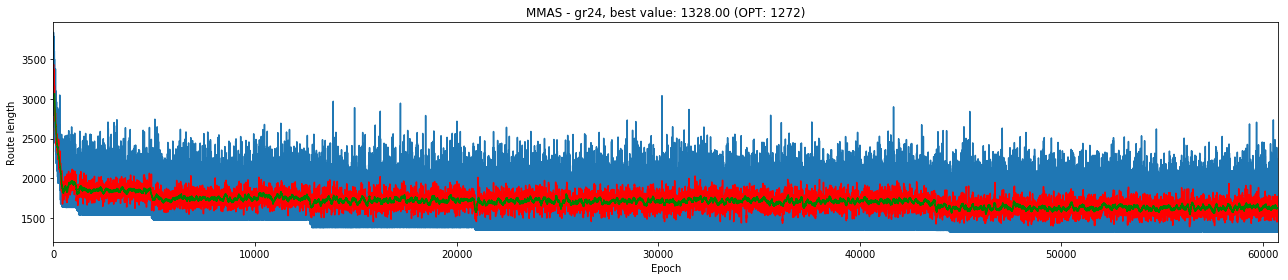

In [96]:
np.random.seed(0)  # Always produce the same random decisions (for debugging)
mmas = algo.MMAS(gr24_problem, wall_clock_time=10*60)  # Run for 10 minutes
mmas()

Stopped after 0.74 minutes


(1272,
 array([ 7, 20,  4,  9, 16, 21, 17, 18, 14,  1, 19, 13, 12,  8, 22,  3, 11,
         0, 15, 10,  2,  6,  5, 23]))

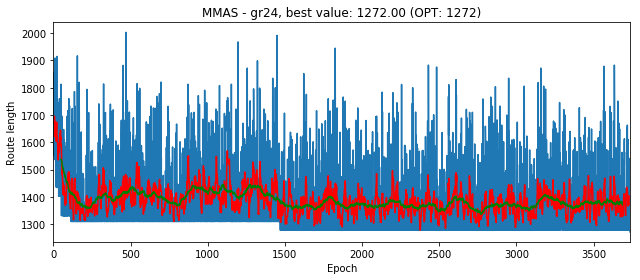

In [97]:
np.random.seed(0)
mmas = algo.MMAS(gr24_problem, wall_clock_time=10*60, beta=4)
mmas()

1. Without heuristic information: 1328
2. With $\beta$ = 4:  1272  [ 7 20 4 9 16 21 17 18 14 1 19 13 12 8 22 3 11 0 15 10 2 6 5 23 ]
3. We found the same solution but shifted and with 0-based IDs
4. Without $\beta$ we didn't find the solution within the 10 minutes. Using $\beta$ it took only ~45 seconds finding the optimal solution.

# Parameter tuning

In [8]:
# Take a harder example so it will be actually hard to find the best solution
gr48_problem = tsp_parser.load_problem('data/gr48')
gr96_problem = tsp_parser.load_problem('data/gr96')
print('Best solution for gr48: {}'.format(gr48_problem['opt']))

Best solution for gr48: 5046


alpha=2 beta=6 rho=0.0208 tau_min=0.0004 tau_max=47.9792


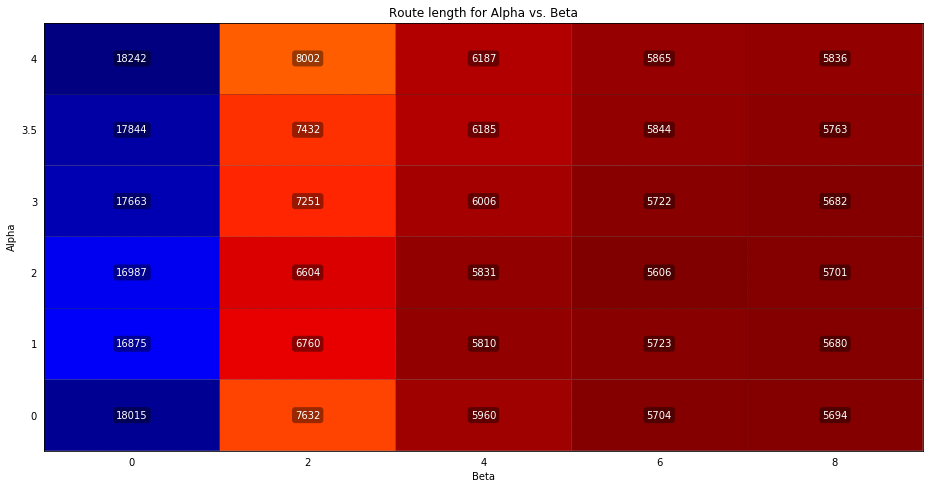

In [175]:
alphas=[0, 1, 2, 3, 3.5, 4]
betas=[0, 2, 4, 6, 8]
opt_params, costs = utils.grid_search(gr48_problem, alphas=alphas,
                                      betas=betas, runtime=1, tries=20)
print('alpha={} beta={} rho={:.4f} tau_min={:.4f} tau_max={:.4f}'.format(*opt_params))
utils.plot_parameter_heatmap(costs, (alphas, 'Alpha'), (betas, 'Beta'))

In [206]:
opt_alpha = 1
opt_beta = 6

alpha=1 beta=6 rho=0.6164 tau_min=0.0004 tau_max=47.9792


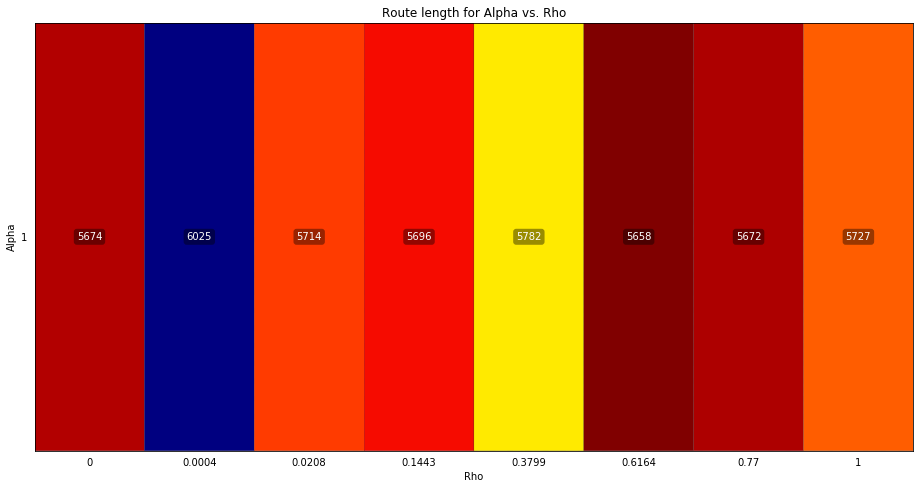

In [212]:
alphas=[opt_alpha]
n = gr48_problem['dimension']
rhos=[round(x, 4) for x in [0, 1/n**2, 1/n, 1/n**0.5, 1/n**0.25, 1/n**0.125, 1/n**0.0675, 1]]
opt_params, costs = utils.grid_search(gr48_problem, alphas=alphas,
                                      betas=[opt_beta], rhos=rhos, runtime=1, tries=10)
print('alpha={} beta={} rho={:.4f} tau_min={:.4f} tau_max={:.4f}'.format(*opt_params))
utils.plot_parameter_heatmap(costs, (alphas, 'Alpha'), (rhos, 'Rho'))

In [3]:
opt_rho = lambda n: 1/n**0.25

alpha=1 beta=6 rho=0.3799 tau_min=0.0208 tau_max=47.9792


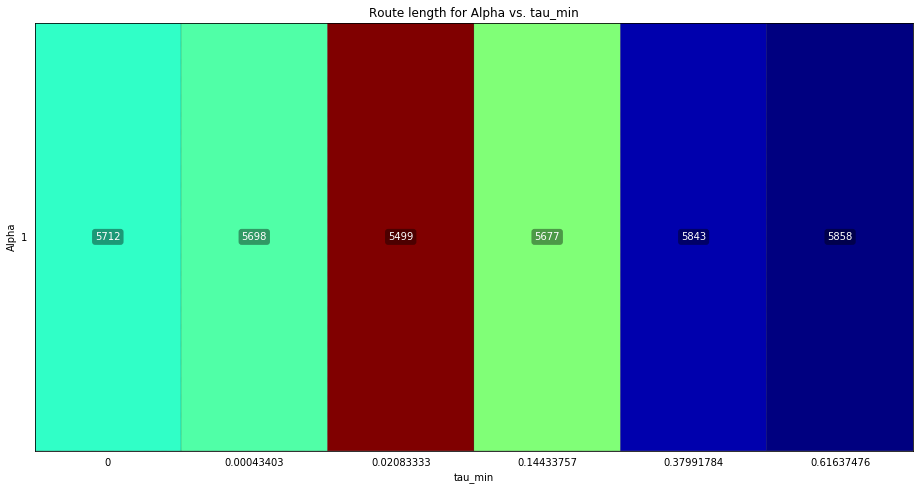

In [214]:
alphas=[opt_alpha]
n = gr48_problem['dimension']
# Applying a factor (e.g. 0,5 or 2) doesn't affect the results -> Change power value
tau_mins=[round(x, 8) for x in [0, 1/n**2, 1/n, 1/n**0.5, 1/n**0.25, 1/n**0.125]]
opt_params, costs = utils.grid_search(gr48_problem, alphas=alphas, betas=[opt_beta],
                                      rhos=[opt_rho(n)], tau_mins=tau_mins, runtime=2, tries=10)
print('alpha={} beta={} rho={:.4f} tau_min={:.4f} tau_max={:.4f}'.format(*opt_params))
utils.plot_parameter_heatmap(costs, (alphas, 'Alpha'), (tau_mins, 'tau_min'))

In [4]:
opt_tau_min = lambda n: 1/n

Execute this parameter tuning with 5 minutes wall clock time (instead of 1 second) for parameters which influence the performance on the long run.

alpha=2 beta=6 rho=0.3799 tau_min=0.0208 tau_max=0.7500


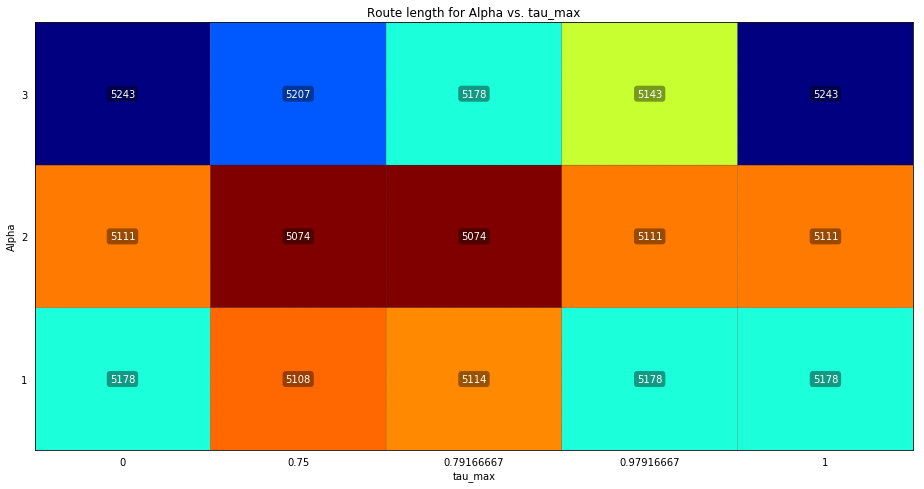

In [220]:
alphas=[1, 2, 3]
tau_maxs=[round(x, 8) for x in [0, 1-min(20, n/4)/n, 1-min(10, n/4)/n, 1-1/n, 1]]
n = gr48_problem['dimension']
opt_params, costs = utils.grid_search(gr48_problem, alphas=alphas, tau_maxs=tau_maxs,
                                      betas=[opt_beta], tau_mins=[opt_tau_min(n)], rhos=[opt_rho(n)], runtime=300, tries=1)
print('alpha={} beta={} rho={:.4f} tau_min={:.4f} tau_max={:.4f}'.format(*opt_params))
utils.plot_parameter_heatmap(costs, (alphas, 'Alpha'), (tau_maxs, 'tau_max'))

In [5]:
opt_tau_max = lambda n: 1-min(20, n/4)/n

From now on we define our parameter setting using `utils.opt_setting(problem)` [containing the results of the parameter tuning]

gr24 - Compare parameter settings:


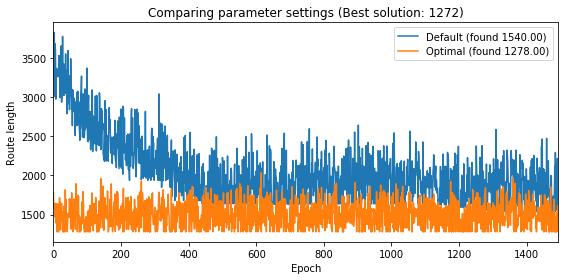

gr48 - Compare parameter settings:


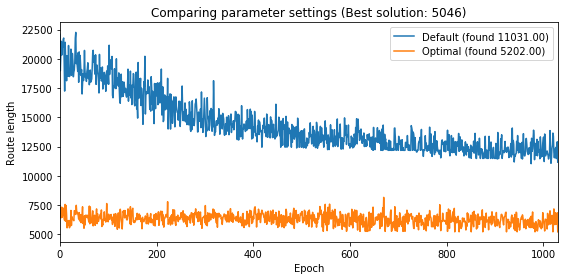

gr96 - Compare parameter settings:


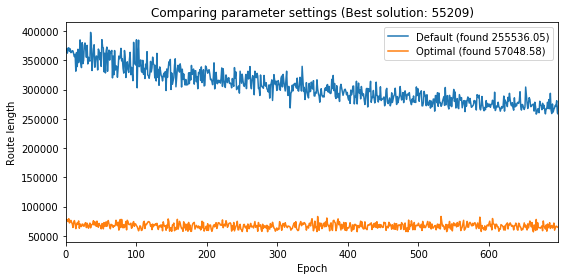

gr24 [Default params]:
Stopped after 10.00 minutes


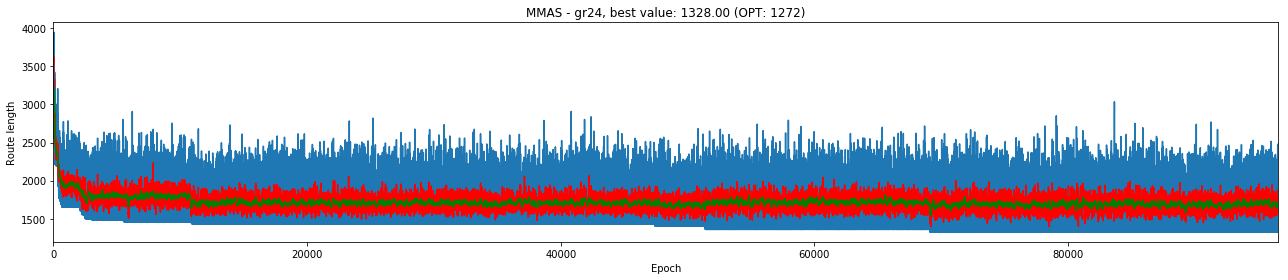

gr24 [Optimal params]:
Stopped after 4.68 minutes


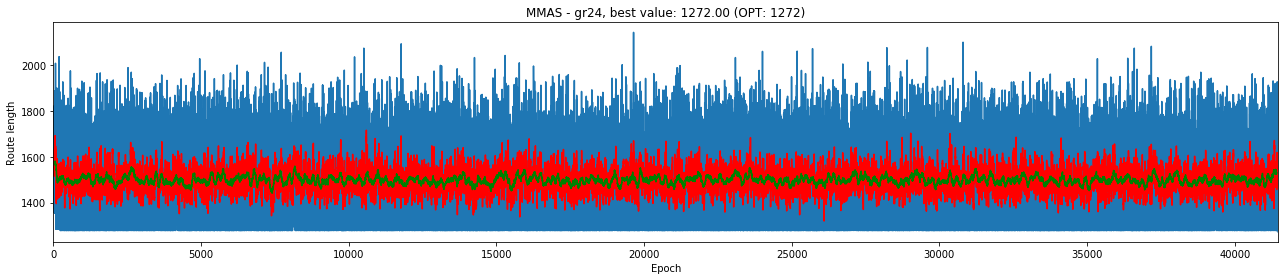

gr48 [Default params]:
Stopped after 10.00 minutes


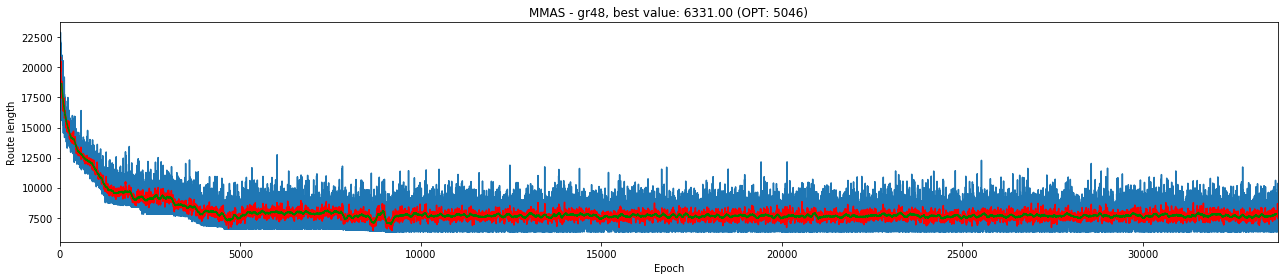

gr48 [Optimal params]:
Stopped after 10.00 minutes


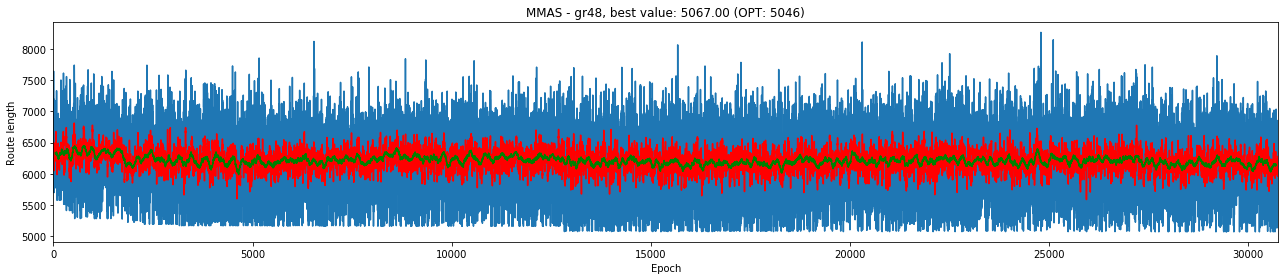

gr96 [Default params]:
Stopped after 10.00 minutes


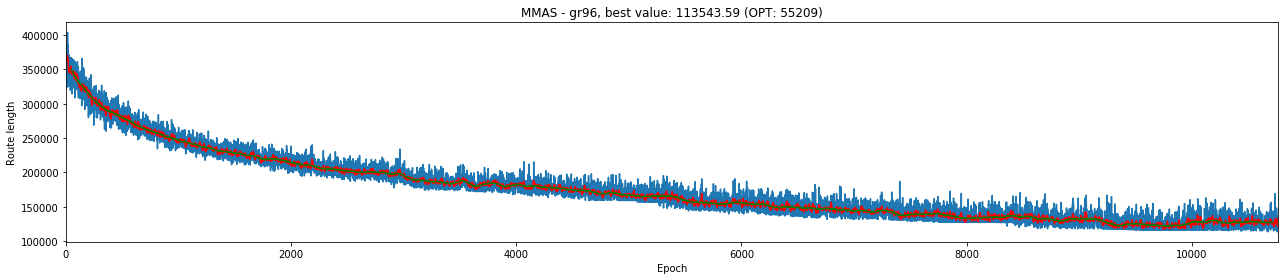

gr96 [Optimal params]:
Stopped after 10.00 minutes


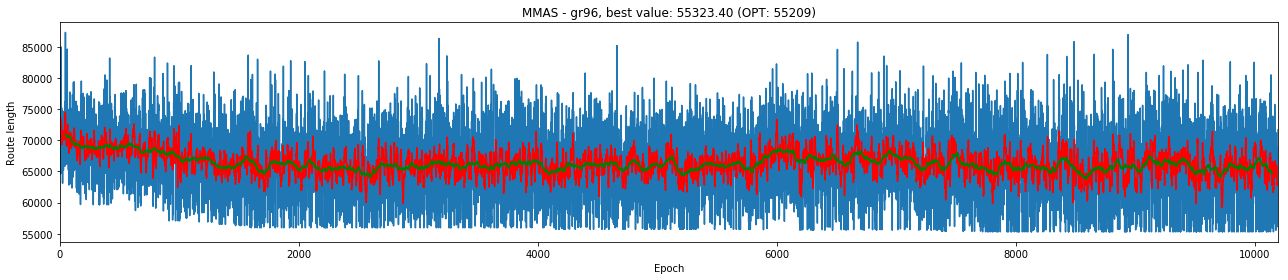

In [221]:
# Evaluate best params on a short time interval
print('gr24 - Compare parameter settings:')
utils.evaluate_params(gr24_problem, utils.opt_setting(gr24_problem), runtime=10)
print('gr48 - Compare parameter settings:')
utils.evaluate_params(gr48_problem, utils.opt_setting(gr48_problem), runtime=20)
print('gr96 - Compare parameter settings:')
utils.evaluate_params(gr96_problem, utils.opt_setting(gr96_problem), runtime=40)

# Run on simple, middle and big problem for 10 minutes to evaluate if we can improve the solution
# Compare the default parameter with our parameters
opt_setting = utils.opt_setting(gr24_problem)
print('gr24 [Default params]:')
algo.MMAS(gr24_problem, wall_clock_time=600)()
print('gr24 [Optimal params]:')
algo.MMAS(gr24_problem, wall_clock_time=600, **opt_setting)()

opt_setting = utils.opt_setting(gr48_problem)
print('gr48 [Default params]:')
algo.MMAS(gr48_problem, wall_clock_time=600)()
print('gr48 [Optimal params]:')
algo.MMAS(gr48_problem, wall_clock_time=600, **opt_setting)()

opt_setting = utils.opt_setting(gr96_problem)
print('gr96 [Default params]:')
algo.MMAS(gr96_problem, wall_clock_time=600)()
print('gr96 [Optimal params]:')
_ = algo.MMAS(gr96_problem, wall_clock_time=600, **opt_setting)()

#### Conclusion (Parameter tuning)
- We executed the algorithm for each setting with a different walltime. e.g. t_max and alpha will be important on long runs so it was executed over 5 minutes (instead of a few seconds)
- The performance of the algorithm strongly correlates with $\beta$. Good results always include a high value for $\beta$.
- To find the best parameters we would have to expand our search exponentially so we decided to find good parameters step by step
- Some of the parameters really depend on the size of the problem. We received different optimal parameters for $\rho$, $\tau_{min}$ and $\tau_{max}$ if we use gr24 instead of gr48.
- For $\rho$ it looks like $n^{-\frac{1}{4}}$ is a good parameter (assuming that it has to depend on $n$)
- For $\tau_{min}$ it looks like $n^{-2}$ is a good parameter (assuming that it has to depend on $n$)
- For $\tau_{max}$ it looks like $1-\frac{min(20, \frac{n}{4})}{n}$ is a good parameter (assuming that it has to depend on $n$ and is close to 1)
- Although we trained our parameters on a single problem we get much better results in three problems with different sizes
- Especially on the big problem (gr96) MMAS with our parameters found a much better solution which is actually very close to the optimal solution
- After the first execution of parameter tuning we got $\alpha=3$ as part of a good parameter setting. After testing on different problems with 10 minutes wall clock time we saw that the algorithm gets stuck not far away from the optimal solution - even on a small problem where it should be able to find the optimal solution. After defining $\alpha=1$ we executed the parameter tuning and the long time tests a second time and found better results.
- With these parameters on gr96 it's strongly fluctuating. Thus it's able to expand the search space and find good results.
- Resources
    - 2.3 GHz Intel Core i5
    - 2.5 GHz Intel Core i7

Parameters for further tests: $\beta=8$ , $\alpha=1$ , $\rho=n^{-\frac{1}{4}}$ , $tau_{min}=n^{-2}$ , $tau_{max}=1-\frac{min(20, \frac{n}{4})}{n}$

## Collecting extra credtis

#### 1.) "Solving an instance from TSPLib with at least 40 cities optimally":

Stopped after 0.31 minutes
We found the optimal route for d42:
Costs = 699 [optimum]
9 8 7 6 5 4 3 2 1 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10


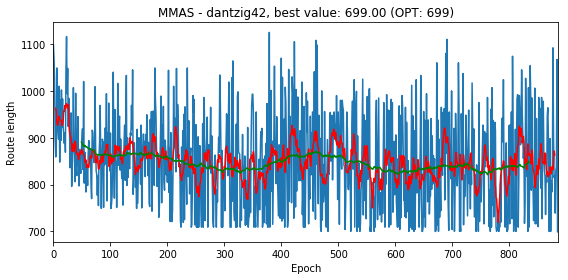

In [20]:
# Run dantzig42 for 60 minutes
np.random.seed(0)
d42_problem = tsp_parser.load_problem('data/dantzig42')
opt_setting = utils.opt_setting(d42_problem)
mmas42 = algo.MMAS(d42_problem, wall_clock_time=60*60, **opt_setting)
route_length, route = mmas42()
if route_length == d42_problem['opt']:
    # Shift indizes to their original value 
    print('We found the optimal route for d42:\nCosts = {} [optimum]\n{}'.format(
        route_length,
        ' '.join([str(x + 1) for x in route])))

Notes:

    1. We found the optimal solution for the dantzig42 problem after executing our tuned MMAS for 20 seconds
    2. Optimal solution:
        9 8 7 6 5 4 3 2 1 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10
    3. Before executing on this problem we failed getting the optimal solution for the problems gr48 & berlin52 (runtime: 10h). It always converged after at least 1 hour at a almost optimal solution (sometimes only 5 meters longer than the optimum).

#### 2.) "Solving an instance from TSPLib with at least 100 cities at most 1% worse than the optimum tour length":

Stopped after 30.00 minutes


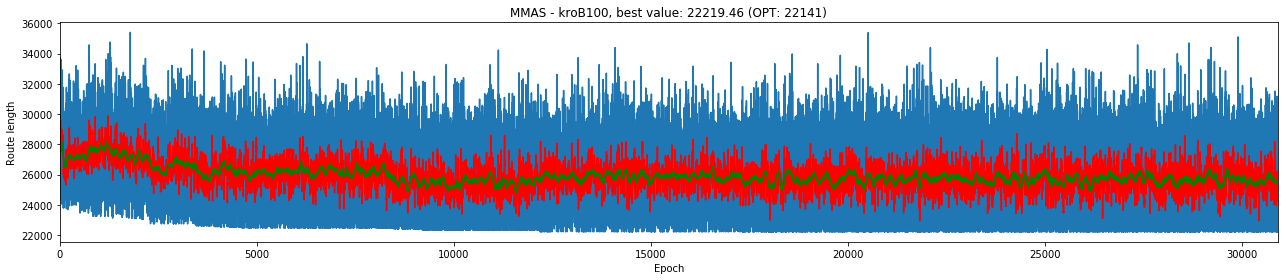

In [5]:
# Run dantzig42 for 30 minutes
np.random.seed(0)
krob100_problem = tsp_parser.load_problem('data/kroB100')
opt_setting = utils.opt_setting(krob100_problem)
mmasb100 = algo.MMAS(krob100_problem, wall_clock_time=30*60, **opt_setting)
route_length, route = mmasb100()

After 30 minutes: 22219.46

Optimum: 22141

$(22219.46 - 22141) / 22141 = 0.0035$


We found a solution for the kroB100 problem which is only 0.35 % worse than the optimum. Before that we tried executing MMAS on kroA100 but only found a solution being 1.03% worse than the optimum.

#### 3.) "Solving an instance from TSPLib with at least 1000 cities at most 30% worse than the optimum tour length":

In [3]:
dsj1000_problem = tsp_parser.load_problem('data/dsj1000') # 1354

Stopped after 540.00 minutes


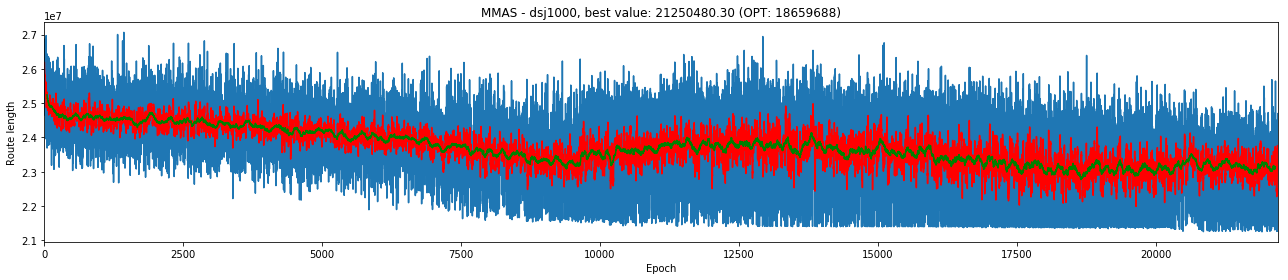

In [11]:
np.random.seed(0)
opt_setting = utils.opt_setting(dsj1000_problem)
mmas = algo.MMAS(dsj1000_problem, wall_clock_time=60*60*9, **opt_setting)
route_length, costs = mmas()

After 9h: 21250480.3

Optimum: 1859688

$(21250480.3 - 18659688) / 18659688 = 0.1388$

We found a solution for the dsj1000 problem which is 13.88 % worse than the optimum

#### 4.) "Being the team which solved the highest-number-of-cities instance from TSPLib at most 50% worse than the optimum tour length":

In [ ]:
d18512_problem = tsp_parser.load_problem('data/d18512')

Stopped after 1565.33 minutes


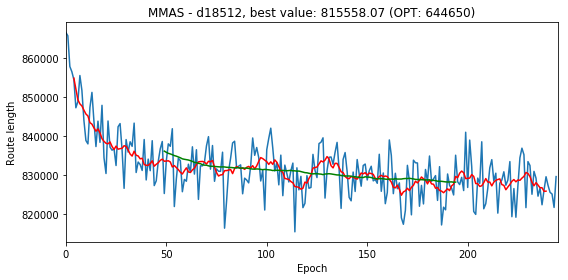

In [3]:
np.random.seed(0)
opt_setting = utils.opt_setting(d18512_problem)
mmas18512 = algo.MMAS(d18512_problem, wall_clock_time=60*60*26, **opt_setting)
route_length, costs = mmas18512()

After 26 hours: 815558.07

Optimum: 644650

$(815558.07 - 644650) / 644650 = 0.2651$

Notes:

    1. We found a solution for the d18512 problem which is 26.51% worse than the optimum
    2. We also tried running MMAS on the two bigger problems (pla85900 and pla33810) but our notebooks couldn't manage the amount of a data (caused by the adjacent matrix).
    3. Resources: i7-6700 CPU @ 3.40GHz